<a href="https://colab.research.google.com/github/caltunay/selfIsolation_refreshers/blob/main/2_SMS_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd


os.environ['KAGGLE_USERNAME'] = "hellaxx" # username from the json file 
os.environ['KAGGLE_KEY'] = "22118201b9594da0e42c9afc84e8e845" # key from the json file

!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 30.8MB/s]


In [ ]:
!unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [ ]:
!ls

drive  sample_data  sms-spam-collection-dataset.zip  spam.csv


In [ ]:
pd.read_csv('spam.csv')

UnicodeDecodeError: ignored

In [ ]:
import chardet

In [ ]:
with open('spam.csv', 'rb') as data:
    result = chardet.detect(data.read(1000))

result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:
df = pd.read_csv('spam.csv', encoding = result['encoding'])
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.sample(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3982,ham,Nationwide auto centre (or something like that...,NaN,NaN,NaN
360,ham,Ha ha cool cool chikku chikku:-):-DB-),NaN,NaN,NaN
1237,ham,Is ur paper in e morn or aft tmr?,NaN,NaN,NaN
1028,ham,"Lol you forgot it eh ? Yes, I'll bring it in babe",NaN,NaN,NaN
1826,ham,Dude. What's up. How Teresa. Hope you have bee...,NaN,NaN,NaN
1491,spam,Your account has been credited with 500 FREE T...,NaN,NaN,NaN
4312,ham,"I wasn't well babe, i have swollen glands at m...",NaN,NaN,NaN
2244,ham,No management puzzeles.,NaN,NaN,NaN
2084,ham,How are you. Wish you a great semester,NaN,NaN,NaN
1130,ham,Howz pain?hope u r fine..,NaN,NaN,NaN


In [ ]:
df['sms_length'] = df['v2'].apply(len)

In [ ]:
longest_msg = df[df['sms_length'] == df['sms_length'].max()]['v2'].values[0]
longest_msg

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

* clean punctuation
* clean stopwords
* stem/lemmatize
* tf/idf

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from string import punctuation

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords_ = stopwords.words('english')

In [80]:
test_str = df[df['sms_length']==df['sms_length'].max()]['v2'].values[0]
test_str

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [ ]:
no_punc = [char for char in test_str if char not in punctuation]
no_punc

In [99]:
no_punc_joined = ''.join(no_punc)
no_punc_joined

'For me the love should start with attractioni should feel that I need her every time around meshe should be the first thing which comes in my thoughtsI would start the day and end it with hershe should be there every time I dreamlove will be then when my every breath has her namemy life should happen around hermy life will be named to herI would cry for herwill give all my happiness and take all her sorrowsI will be ready to fight with anyone for herI will be in love when I will be doing the craziest things for herlove will be when I dont have to proove anyone that my girl is the most beautiful lady on the whole planetI will always be singing praises for herlove will be when I start up making chicken curry and end up makiing sambarlife will be the most beautiful thenwill get every morning and thank god for the day because she is with meI would like to say a lotwill tell later'

In [105]:
no_stopwords_punc = [word.lower() for word in no_punc_joined.split() if word.lower() not in stopwords_]

In [106]:
def sms_cleaner(text_):
    no_punc_ = [char for char in text_ if char not in punctuation]
    no_punc_joined_ = ''.join(no_punc_)
    cleaned_text_list = [word.lower() for word in no_punc_joined_.split() if word.lower() not in stopwords_]
    return cleaned_text_list

In [107]:
test_str

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [109]:
tfidf_engine = TfidfVectorizer(analyzer = sms_cleaner)

In [115]:
text_matrix = tfidf_engine.fit_transform(df['v2']).toarray()

In [123]:
y = df['v1'].apply(lambda x: 1 if x == 'spam' else 0).values

In [138]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
x_train, x_test, y_train, y_test = train_test_split(text_matrix, y, test_size = .25)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4179, 9431) (1393, 9431) (4179,) (1393,)


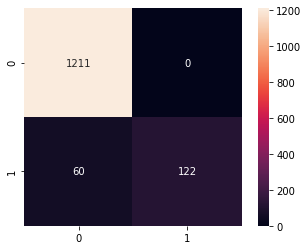


               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1211
           1       1.00      0.67      0.80       182

    accuracy                           0.96      1393
   macro avg       0.98      0.84      0.89      1393
weighted avg       0.96      0.96      0.95      1393



In [133]:
nb = MultinomialNB()
nb.fit(x_train, y_train)


nb_preds = nb.predict(x_test)

nb_cm = confusion_matrix(y_test, nb_preds)
nb_cr = classification_report(y_test, nb_preds)

sns.heatmap(nb_cm, square = True, fmt = '', annot = True)
plt.show()

print('\n', nb_cr)

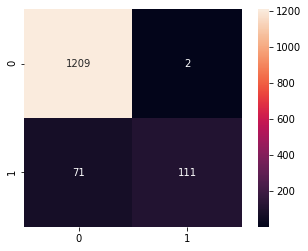


               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1211
           1       0.98      0.61      0.75       182

    accuracy                           0.95      1393
   macro avg       0.96      0.80      0.86      1393
weighted avg       0.95      0.95      0.94      1393



In [135]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

lr_preds = lr.predict(x_test)

lr_cm = confusion_matrix(y_test, lr_preds)
lr_cr = classification_report(y_test, lr_preds)

sns.heatmap(lr_cm, square = True, fmt = '', annot = True)
plt.show()

print('\n',lr_cr)


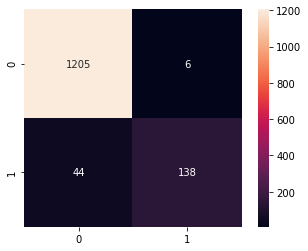


               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1211
           1       0.96      0.76      0.85       182

    accuracy                           0.96      1393
   macro avg       0.96      0.88      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [137]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
ada_preds = ada.predict(x_test)

ada_cm = confusion_matrix(y_test, ada_preds)
ada_cr = classification_report(y_test, ada_preds)

sns.heatmap(ada_cm, annot = True, square = True, fmt = '')
plt.show();

print('\n', ada_cr)

In [164]:
kfold = StratifiedKFold(n_splits = 4, shuffle = False, random_state = 42)

nb_cv = MultinomialNB()
lr_cv = LogisticRegression()
ada_cv = AdaBoostClassifier()

nb_scores = list()
lr_scores = list()
ada_scores = list()

for train_index, validation_index in kfold.split(x_train, y_train):

    x_train_fold, x_validation_fold = x_train[train_index], x_train[validation_index]
    y_train_fold, y_validation_fold = y_train[train_index], y_train[validation_index]

    nb_cv.fit(x_train_fold, y_train_fold)
    lr_cv.fit(x_train_fold, y_train_fold)
    ada_cv.fit(x_train_fold, y_train_fold)

    # nb_cv_preds = nb_cv.predict(x_validation_fold)
    # lr_cv_preds = lr_cv.predict(x_validation_fold)
    # ada_cv_preds = ada_cv.predict(x_validation_fold)

    nb_scores_temp = nb_cv.score(x_validation_fold, y_validation_fold)
    lr_scores_temp = lr_cv.score(x_validation_fold, y_validation_fold)
    ada_scores_temp = ada_cv.score(x_validation_fold, y_validation_fold)

    nb_scores.append(nb_scores_temp)
    lr_scores.append(lr_scores_temp)
    ada_scores.append(ada_scores_temp)

print(nb_scores, '\n', lr_scores, '\n', ada_scores, '\n', )

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.9464114832535885, 0.9464114832535885, 0.9531100478468899, 0.9511494252873564] 
 [0.9320574162679426, 0.9282296650717703, 0.9330143540669856, 0.9377394636015326] 
 [0.9645933014354067, 0.9626794258373206, 0.9569377990430622, 0.9482758620689655] 



In [180]:
print(f'Cross Validated Scores: \n\nNB Scores: {round(np.mean(nb_scores)*100,1)}% \nLR Scores: {round(np.mean(lr_scores)*100,1)}%  \nNB Scores: {round(np.mean(ada_scores)*100,1)}% ')

Cross Validated Scores: 

NB Scores: 94.9% 
LR Scores: 93.3%  
NB Scores: 95.8% 
